Testing notebook, trying things :)

In [1]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#fixing the cache repo
fastf1.Cache.enable_cache("../cache")

In [3]:
YEAR = 2024
GP = "Monaco"
SESSION = "R"

session = fastf1.get_session(YEAR, GP, SESSION)
session.load()

#basic infos about the session loaded
print(session.event['EventName'])
print("Drivers in session:", session.laps['Driver']. unique().tolist())
print("Total laps dataframe rows", len(session.laps))
session.laps.head()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


Monaco Grand Prix
Drivers in session: ['LEC', 'PIA', 'SAI', 'NOR', 'RUS', 'VER', 'HAM', 'TSU', 'ALB', 'GAS', 'ALO', 'RIC', 'BOT', 'STR', 'SAR', 'ZHO', 'OCO', 'PER', 'HUL', 'MAG']
Total laps dataframe rows 1237


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,True,Ferrari,0 days 00:55:05.680000,2024-05-26 13:03:11.069,1254,1.0,False,,False,False
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,True,Ferrari,0 days 01:35:54.733000,2024-05-26 13:44:00.122,14,1.0,False,,False,False
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,True,Ferrari,0 days 01:39:00.140000,2024-05-26 13:47:05.529,1,1.0,False,,False,True
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,True,Ferrari,0 days 01:40:24.764000,2024-05-26 13:48:30.153,1,1.0,False,,False,True
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,True,Ferrari,0 days 01:41:47.389000,2024-05-26 13:49:52.778,1,1.0,False,,False,True


In [4]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:07.152000,Finished,18.0,78.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:07.585000,Finished,15.0,78.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:08.650000,Finished,12.0,78.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,5.0,5,5.0,NaT,NaT,NaT,0 days 00:00:13.309000,Finished,10.0,78.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:13.853000,Finished,8.0,78.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,7.0,7,7.0,NaT,NaT,NaT,0 days 00:00:14.908000,Finished,7.0,78.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:39.487000,Lapped,4.0,77.0
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,9.0,9,9.0,NaT,NaT,NaT,0 days 00:00:54.052000,Lapped,2.0,77.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,10.0,10,10.0,NaT,NaT,NaT,0 days 00:01:00.241000,Lapped,1.0,77.0


In [5]:
session.results.iloc[0:10].loc[:, ['Abbreviation', 'Position', 'Time', 'Points']] 

,Abbreviation,Position,Time,Points
16,LEC,1.0,0 days 02:23:15.554000,25.0
81,PIA,2.0,0 days 00:00:07.152000,18.0
55,SAI,3.0,0 days 00:00:07.585000,15.0
4,NOR,4.0,0 days 00:00:08.650000,12.0
63,RUS,5.0,0 days 00:00:13.309000,10.0
1,VER,6.0,0 days 00:00:13.853000,8.0
44,HAM,7.0,0 days 00:00:14.908000,7.0
22,TSU,8.0,0 days 00:00:39.487000,4.0
23,ALB,9.0,0 days 00:00:54.052000,2.0
10,GAS,10.0,0 days 00:01:00.241000,1.0


In [6]:
schedule = fastf1.get_event_schedule(2024)
#i can use methods to select specific events
gp10 = schedule.get_event_by_round(10)
gp10['Country']
gp_monaco = schedule.get_event_by_name("Monaco Grand Prix")
gp_monaco['Country']

'Monaco'

In [7]:
#now we can work on laps and lap times
#let's load the quali times

quali = fastf1.get_session(2024, "Monaco", "Q")
quali.load()
quali.laps

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '3', '18', '27', '14', '2', '20', '11', '77', '24']


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:37.749000,LEC,16,0 days 00:01:47.009000,1.0,1.0,0 days 00:15:51.382000,NaT,0 days 00:00:33.194000,0 days 00:00:44.490000,...,True,Ferrari,0 days 00:15:51.382000,2024-05-25 14:02:56.065,1,NaN,False,,False,False
1,0 days 00:18:50.588000,LEC,16,0 days 00:01:12.839000,2.0,1.0,NaT,NaT,0 days 00:00:19.297000,0 days 00:00:34.137000,...,True,Ferrari,0 days 00:17:37.749000,2024-05-25 14:04:42.432,1,NaN,False,,False,True
2,0 days 00:20:27.621000,LEC,16,0 days 00:01:37.033000,3.0,1.0,NaT,NaT,0 days 00:00:27.498000,0 days 00:00:43.667000,...,True,Ferrari,0 days 00:18:50.588000,2024-05-25 14:05:55.271,1,NaN,False,,False,True
3,0 days 00:21:40.073000,LEC,16,0 days 00:01:12.452000,4.0,1.0,NaT,NaT,0 days 00:00:18.794000,0 days 00:00:34.388000,...,True,Ferrari,0 days 00:20:27.621000,2024-05-25 14:07:32.304,1,NaN,False,,False,True
4,0 days 00:23:36.311000,LEC,16,0 days 00:01:56.238000,5.0,1.0,NaT,0 days 00:22:54.986000,0 days 00:00:21.593000,0 days 00:00:38.423000,...,True,Ferrari,0 days 00:21:40.073000,2024-05-25 14:08:44.756,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0 days 00:27:54.437000,ZHO,24,0 days 00:01:37.528000,7.0,2.0,0 days 00:26:17.967000,NaT,0 days 00:00:30.656000,0 days 00:00:41.789000,...,True,Kick Sauber,0 days 00:26:16.909000,2024-05-25 14:13:21.592,12,NaN,False,,False,False
422,0 days 00:29:07.684000,ZHO,24,0 days 00:01:13.247000,8.0,2.0,NaT,NaT,0 days 00:00:19.409000,0 days 00:00:34.270000,...,True,Kick Sauber,0 days 00:27:54.437000,2024-05-25 14:14:59.120,1,NaN,False,,False,True
423,0 days 00:30:47.377000,ZHO,24,0 days 00:01:39.693000,9.0,2.0,NaT,NaT,0 days 00:00:23.069000,0 days 00:00:45.782000,...,True,Kick Sauber,0 days 00:29:07.684000,2024-05-25 14:16:12.367,1,NaN,False,,False,True
424,0 days 00:32:00.405000,ZHO,24,0 days 00:01:13.028000,10.0,2.0,NaT,NaT,0 days 00:00:19.387000,0 days 00:00:34.172000,...,True,Kick Sauber,0 days 00:30:47.377000,2024-05-25 14:17:52.060,1,NaN,False,,False,True


In [8]:
fastest_lap = quali.laps.pick_fastest()
fastest_lap['LapTime']
fastest_lap['Driver']

'LEC'

Plotting a graph for the quali times

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None)
session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']


In [10]:
#creating an array of drivers
drivers = pd.unique(session.laps['Driver'])
fastest_laps = list()
#lets populate it
for driver in drivers:
    fastest_lap = session.laps.pick_drivers(driver).pick_fastest()
    fastest_laps.append(fastest_lap)
fastest_laps = Laps(fastest_laps).sort_values(by= 'LapTime').reset_index(drop=True)

In [11]:
pole = fastest_laps.iloc[0]
fastest_laps['DeltaToPole'] = fastest_laps['LapTime'] - pole['LapTime']
print(fastest_laps[['Driver', 'LapTime', 'DeltaToPole']])

   Driver                LapTime            DeltaToPole
0     HAM 0 days 00:01:16.741000        0 days 00:00:00
1     VER 0 days 00:01:16.777000 0 days 00:00:00.036000
2     BOT 0 days 00:01:16.873000 0 days 00:00:00.132000
3     LEC 0 days 00:01:17.510000 0 days 00:00:00.769000
4     OCO 0 days 00:01:17.580000 0 days 00:00:00.839000
5     SAI 0 days 00:01:17.620000 0 days 00:00:00.879000
6     RIC 0 days 00:01:17.622000 0 days 00:00:00.881000
7     PER 0 days 00:01:17.669000 0 days 00:00:00.928000
8     NOR 0 days 00:01:17.696000 0 days 00:00:00.955000
9     ALO 0 days 00:01:17.966000 0 days 00:00:01.225000
10    STR 0 days 00:01:17.974000 0 days 00:00:01.233000
11    GAS 0 days 00:01:17.982000 0 days 00:00:01.241000
12    VET 0 days 00:01:18.079000 0 days 00:00:01.338000
13    GIO 0 days 00:01:18.356000 0 days 00:00:01.615000
14    RUS 0 days 00:01:18.445000 0 days 00:00:01.704000
15    TSU 0 days 00:01:18.556000 0 days 00:00:01.815000
16    RAI 0 days 00:01:18.917000 0 days 00:00:02

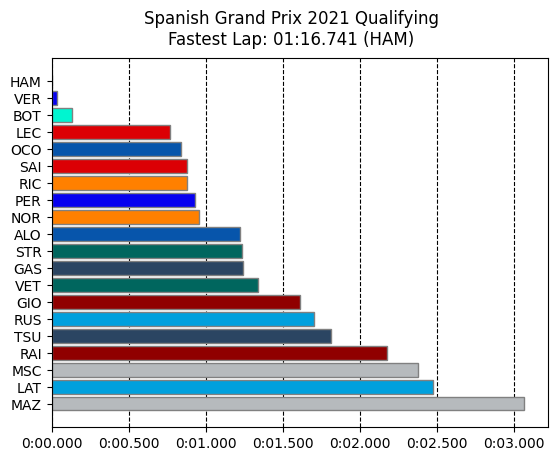

In [14]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['DeltaToPole'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole['Driver']})")

plt.show()